<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/04_pytorch_dados_personalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch para datasets proprios

## Cada tipo tem um "pytorch" proprio

* Texto - torchtext
* Audio - torchaudio
* Sistema de Recomendacao - torchrec
* Visao computacional - torchvision

Cada tipo tem uma biblioteca para funcoes de carregamento de dados e funcoes customizadas para o mesmo

## 0. Importando Pytorch e fazendo o selecionador de dispositivo

In [1]:
import torch
from torch import nn

torch.__version__

'2.4.0+cu121'

In [2]:
#Diagnostico de dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Conseguindo os dados

O dataset usado eh um sub dataset do Food101

O conjunto original possui 101 classes diferentes e 1000 imagens por classe, sendo 750 de treino e 250 para teste.
O sub conjunto possui apenas 3 classes(stake, pizza, sushi) e apenas 10% de imagens. +-75 para treino e =-25 para teste.
O Pq disso?
Segundo o professor, e importnte comecar projetos de ML de maineira pequena e ir incrementando conforme necessidade. Tal tecnica de da pela velocidade que se pode experimentar coisas novas com um conjunto pequeno que nao demora para ser processado e tranformado e treinando, bem como testado.

In [3]:
import requests
import zipfile
from pathlib import Path
#COnfigurando o caminho para a pasta "data"
data_path = Path("data/")
image_path = data_path / "pizza_stake_sushi"

#Se a pasta das imagens nao existe, iremos criar e baixar os dados d github
if image_path.is_dir():
  print(f"{image_path} Diretorio existente, pulando download...")
else:
  print(f"{image_path} nao existe, criando...")
  image_path.mkdir(parents=True, exist_ok=True)

#Baixzando os dados pizza, steak, sushi
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/HammadN98/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Baixando os dados...")
  f.write(request.content)

#Descompactando os dados
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Descompactando")
  zip_ref.extractall(image_path)

data/pizza_stake_sushi nao existe, criando...
Baixando os dados...
Descompactando


## 2. Tornando-se um com os dados(preparacao e exploracao)


In [4]:
import os
def walk_through_dir(dir_path):
  """Passa por todo o diretorio e retorna o conteudo"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Tem {len(dirnames)} diretorios e {len(filenames)} imagens no '{dirpath}")

In [5]:
walk_through_dir(image_path)

Tem 2 diretorios e 0 imagens no 'data/pizza_stake_sushi
Tem 3 diretorios e 0 imagens no 'data/pizza_stake_sushi/test
Tem 0 diretorios e 25 imagens no 'data/pizza_stake_sushi/test/pizza
Tem 0 diretorios e 19 imagens no 'data/pizza_stake_sushi/test/steak
Tem 0 diretorios e 31 imagens no 'data/pizza_stake_sushi/test/sushi
Tem 3 diretorios e 0 imagens no 'data/pizza_stake_sushi/train
Tem 0 diretorios e 78 imagens no 'data/pizza_stake_sushi/train/pizza
Tem 0 diretorios e 75 imagens no 'data/pizza_stake_sushi/train/steak
Tem 0 diretorios e 72 imagens no 'data/pizza_stake_sushi/train/sushi


In [6]:
#Configurando os caminhos de treino e teste
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_stake_sushi/train'),
 PosixPath('data/pizza_stake_sushi/test'))

## 2.1 VIsualizando as Imagens

Os seguintes codigos terao a funcao de:

1. COnseguir todo o caminho de imagens
2. Escolher uma imagem de maneira aleatoria usaondo `random.choice()`
3. Pegar o nome da classe da imagem usando `pathlib.Path.parent.stem`
4. COmo estamos trabalhando com imagens, vamos abrir a imagem com Python'sPIL
5. Mosrar a imsgem e seus metadados

In [7]:
image_path

PosixPath('data/pizza_stake_sushi')

Caminho da Imagem aleatoria: data/pizza_stake_sushi/test/sushi/46797.jpg
Classe da Imagem: sushi
Altura da Imagem: 384
Largura da Imagem: 512


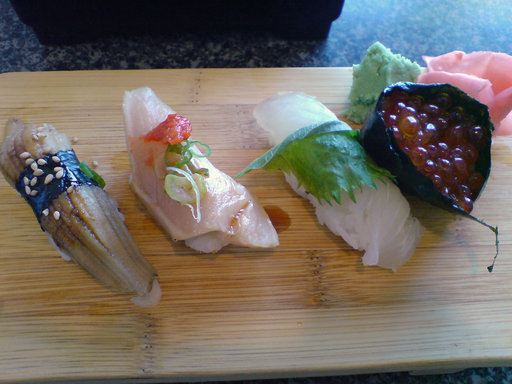

In [8]:
import random
from PIL import Image

#Seed
random.seed(42)

# 1. COnseguindo todos os caminhso das imagens
image_path_list = list(image_path.glob("*/*/*.jpg"))
#image_path_list

# 2. Escolhendo uma imagem aleatoria
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Nome da classe apartir do paht name(A classe da imagem corresponde a pasta que a imagem se encontra)
image_class = random_image_path.parent.stem
#print(f"\n {image_class}")

# 4. Abrindo a imagem
img = Image.open(random_image_path)

# 5. Printando os metadados
print(f"Caminho da Imagem aleatoria: {random_image_path}")
print(f"Classe da Imagem: {image_class}")
print(f"Altura da Imagem: {img.height}")
print(f"Largura da Imagem: {img.width}")
img


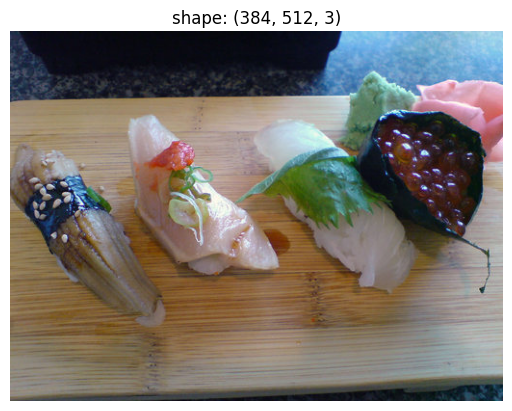

In [9]:
import matplotlib.pyplot as plt

#PAra carregar
ims_plt = plt.imread(random_image_path)

#Para exibir
plt.imshow(ims_plt)

#Removendo eixo
plt.axis("off")

plt.title(f"shape: {ims_plt.shape}")
# Mostrar a imagem
plt.show()

In [10]:
import numpy as np

def imagem_plt(imagem):

  img_as_array = np.asarray(imagem)

  plt.figure(figsize=(10, 7))
  plt.imshow(img_as_array)
  plt.title(f"Classe da Imagem: {image_class} | Shape da Imagem: {img_as_array.shape} -> [Altura, largura, canais]")
  plt.axis(False)


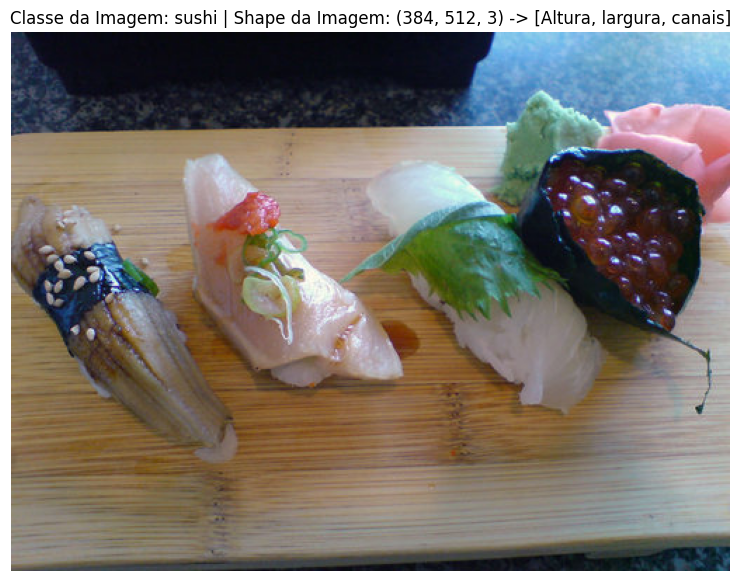

In [11]:
imagem_plt(img)

array([[[ 39,  43,  72],
        [ 42,  46,  73],
        [ 44,  48,  73],
        ...,
        [159, 209, 232],
        [158, 208, 231],
        [159, 209, 232]],

       [[ 32,  43,  71],
        [ 34,  44,  71],
        [ 36,  46,  71],
        ...,
        [158, 208, 233],
        [156, 206, 231],
        [154, 206, 230]],

       [[ 29,  46,  74],
        [ 29,  45,  71],
        [ 29,  45,  70],
        ...,
        [161, 211, 238],
        [158, 209, 236],
        [155, 206, 233]],

       ...,

       [[116, 102,  93],
        [116, 102,  93],
        [116, 102,  93],
        ...,
        [ 25,  62,  81],
        [ 24,  53,  71],
        [ 33,  41,  64]],

       [[104,  94,  93],
        [103,  93,  92],
        [102,  92,  91],
        ...,
        [ 27,  70,  89],
        [ 26,  58,  79],
        [ 35,  40,  69]],

       [[ 90,  87,  78],
        [ 90,  87,  78],
        [ 87,  87,  77],
        ...,
        [ 32,  83, 102],
        [ 23,  64,  84],
        [ 26,  35,  64]]], dtype=uint8)
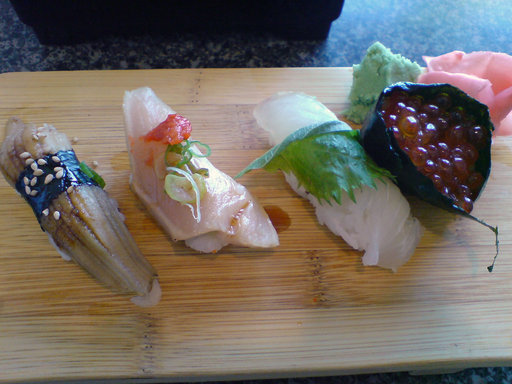

In [12]:
img_as_array = np.asarray(img)
img_as_array

## 3. Transformando os dados

ANtes de usar as imagens com o pytorch:
1. Deve se transformar os dados em tensor(representacao numerica das imagens)
2. Transforma em `torch.utils.data.Dataset` e subsequentemente em `torch.utils.DataLoader`, chamamos de Dataset e Dataloader

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transformand os dados com `torchvision.transfoms`

* jpg -> tensor

In [14]:
#Transformando uma imagem
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    #DEixando a imagem horizontal de maneira random
    transforms.RandomHorizontalFlip(p=0.5),
    #Transformando img em tensor
    transforms.ToTensor()
    ])

In [15]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [16]:
data_transform(img).dtype


torch.float32

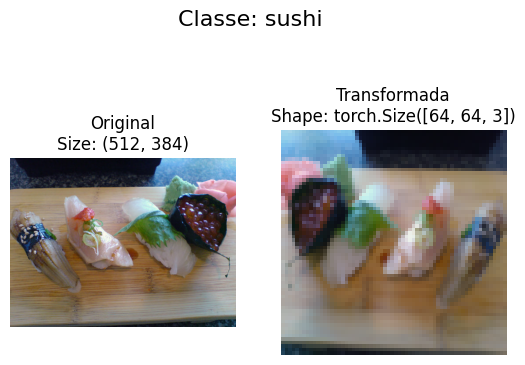

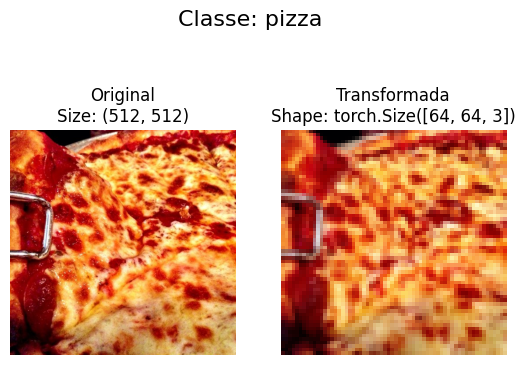

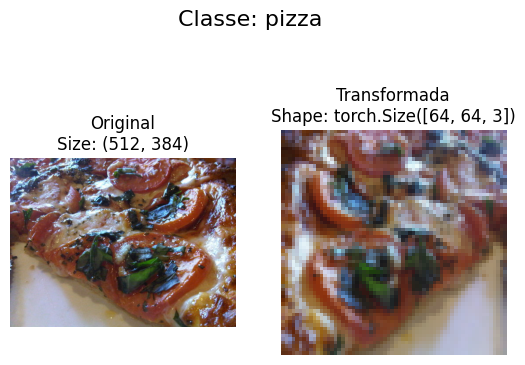

In [17]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Seleciona imagens aleatorias do cominho de imagens e carrega/transforma
  para entao plotar a original e a versao transformada
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      #Transformando e plotando a imagem
      transformed_image = transform(f).permute(1, 2, 0) #Permute para colocar os canais de cores por ultimo
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformada\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Classe: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)



## 4. Opcao 1: Carregando imagens usando `ImageFolder`

As imagens pode ser carregadas usando: `torchvision.datasets.ImageFolder`



In [18]:
#Usando o ImageFolder para criar os datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #Trasformado para os dados
                                  target_transform=None) #Trasformador para os labels/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [19]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_stake_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_stake_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
train_dir, test_dir

(PosixPath('data/pizza_stake_sushi/train'),
 PosixPath('data/pizza_stake_sushi/test'))

In [21]:
#Conseguindo os nomes das classes como list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [22]:
#Conseguindo os nomes das classes como dicionario
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [23]:
len(train_data), len(test_data)

(225, 75)

In [24]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [25]:
train_data.samples[0]

('data/pizza_stake_sushi/train/pizza/1008844.jpg', 0)

In [26]:
#Usando o index do train_data para pegar uma amostra e sua label
img, label = train_data[0][0], train_data[0][1]
print(f"Imagem como Tensor: {img}")
print(f"Shape da Imagem: {img.shape}")
print(f"Tipo de dado da imagem: {img.dtype}")
print(f"Rotulo da Imagem: {label}")
print(f"Tipo de dado do Rotulo: {type(label)}")

Imagem como Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ...

In [27]:
label, class_names[label]

(0, 'pizza')

Shape Original: torch.Size([3, 64, 64]) -> [canais_cor, altura, largura]
Imagem Permutada: torch.Size([64, 64, 3]) -> [altura, largura, canais_cor]


Text(0.5, 1.0, 'pizza')

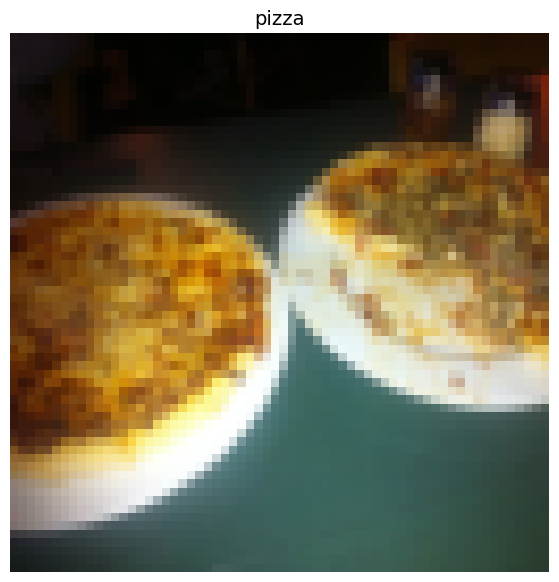

In [28]:
# Reordenara as dimensoes do tensor, pq matplotlib usar canais de cor por ultimo
img_permute = img.permute(1, 2, 0)


#VIsualizandos os formatos dos dados
print(f"Shape Original: {img.shape} -> [canais_cor, altura, largura]")
print(f"Imagem Permutada: {img_permute.shape} -> [altura, largura, canais_cor]")

#Visualizando o imagem
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.1 Transformando as imagens carregadas em `DataLoader`

Um `DataLoader` vai ajudar a tranformar o `Dataset` em um iteravel e nos podemos personalizar o `batch_size` para que o modelo veja `batch_size's` por vez

In [29]:
import os
os.cpu_count()

2

In [30]:
#TRansformando os datasets de treino e teste em DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d0e627e4dc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0e62704640>)

In [31]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [32]:
img, label = next(iter(train_dataloader))

#batch comecera em 1, dps se muda
print(f"Shape da Imagem: {img.shape} -> [batch_size, color_channels, height, witdh]")
print(f"Shape do Label: {label.shape}")


Shape da Imagem: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, witdh]
Shape do Label: torch.Size([1])


## 5. carregando as imagens com uma funcao propria

1. Deve ser capaz de carregar as imagens do arquivo
2. Deve ser capaz de conseguir o nome das classes do dataset
3. Deve ser capaz de conseguir as classes como dicionario do dataset

Pros:
* Pode ser criar um `Dataset` de qualquer coisa
* Nao fica limitado as funcoes pre-montadas do Pytorch

Contras:
* Nao e pq sepode criar um `Dataset` de qualquer coisa, quie isso ira funcionar
* Usar um `Dataset` customizado requer mais codigo, o que pode ocasionar erros e problemas de performace

In [33]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [34]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Criando funcoes auxiliares para conseguir o nome das classes

A funcao serve para:
1. Conseguir o nome das classes usando `os.scandir()` para percorrer o diretorio alvo(Idelamente os diretorio alvo esta da maneira padrao de formato para classicacao de imagens)
2. Levantar um error se os nomes das classes nao puderam ser achados( Caso ocorre, deve ter algo de errado com a estrutura do diretorio)
3. Transformar os nomes das classesem um diretorio e uma lista, e retornar eles.

In [35]:
#Configurando o caminho para o diretorio alvo
target_directory = train_dir
print(f"Diretorio Alvo: {target_directory}")

# COnseguindo os nomes das classes do diretorio alvo
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Diretorio Alvo: data/pizza_stake_sushi/train


['pizza', 'steak', 'sushi']

In [36]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [37]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Encontra as pastas das classes no diretorio alvo"""
  # 1. COnsegue o nome das classes escaneando o diretorio alvo
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Erro de os nomes nao puderem ser achados
  if not classes:
    raise FileNotFoundError(f"Nao puderam ser achados classes no {directory}.... Cheque a estrutura dos arquivos")

  # 3. CRiando um dicionario dos index dos labels( o computador prefere numberos a strings para labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}


  return classes, class_to_idx

### 5.2 Criando uma dataset customizado para imitar o `ImageFolder`

Para criar o nosso dataset customizado, devemos:

1. Criar uma sublcasse apartir de `torch.utils.data.Dataset`
2. Iniciualizar nossa subclasse com o diretorio alvo(o dirtorio que gostariamos de conseguir os dados) e um transformador, caso quissesemos trasnformar os dados
3. Criar os seguintes atributos:
  * paths - caminhos para as imagens
  * transform - para fazer as trasnformacoes necessarias/que queremos nos dados
  * classes - Uma lista das classes
  * class_to_idx - Um dicionario das classes alvos mapeadas com rotulos inteiros

4. Criar uma funcao para `load_images()`, que ira abrir as imagens
5. Reescrever o metodo  `__len()__` para retornar o tamanho dos dados
6. Reescrever o mjetodo `__getitem()__` para retornar uma amostra quando passado o index








In [38]:
# 0. Custom Dataset
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Inicialisando nosso dataset cutom
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Criando os atributos da classe
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    #Configurando o transform
    self.transform = transform
    #Criando as classes e classes index
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index:int) -> Image.Image:
    "Abre e retorna uma imagem via path"
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)


  # 6. Reescrevendo o metodo __getitem__() para retornar uma amostra
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    "Retorna uma amostra, foto e label(X, y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # Espera o caminhono formato: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx #retorn tensor, label(X, y)

    else:
      return img, class_idx #Retorn imagem e label sem transformar


In [39]:
img, label = train_data[0]
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [40]:
#Create a trasnform
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()

])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [41]:
#Tenstando a ImageCustomFolder que fizemos
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                     transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [42]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7d0e627e6380>,
 <__main__.ImageFolderCustom at 0x7d0e627e7be0>)

In [43]:
len(train_data), len(train_data_custom)

(225, 225)

In [44]:
len(test_data), len(test_data_custom)


(75, 75)

In [45]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [46]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [47]:
#Checando se o custom eh igial a criada com o Dataset pytorch
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)


True
True


### 5.3 Criando uma funcao para mostrar imagens de maneira aleatoria

1. Receber o Dataset, nome das classes e quantas imagens receber
2. Para previnir que o display fique dificil de ver, limite de 10 imagens
3. Seed randm
4. Pegar uma lista random de index do dataset
5. Criar um plot do matplotlib
6. PErcorrer as imagens aleatorias e lotar com matplotlib
7. Garantir que as dimensoes das amostras sejam as que o matplotlib reconheca

In [48]:
#1. Criando a funcao que pega o dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None
                          ):

  # 2. Ajustar caso passe de 10 imagens
  if n > 10:
    n = 10
    display_shaoe = False
    print(f"Para que fique apresentaven, nao pode passar de 10 imagens cururu")

  # 3. Seed p reproduzir
  if seed:
    random.seed(seed)

  # 4. Pegar index radom
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Configurando o plot
  plt.figure(figsize=(16,8))

  # 6. Passando pelos index random e plotando as imagens referentes com matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Ajustando as dimensoes(permutando)
    targ_image_adjust = targ_image.permute(1, 2, 0)

    #Plotando as amostras
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title= f"Classe {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)


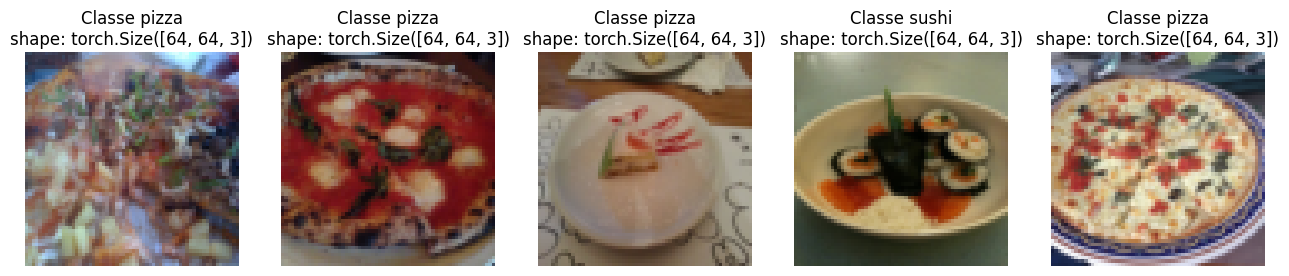

In [49]:
#USando os dados do dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

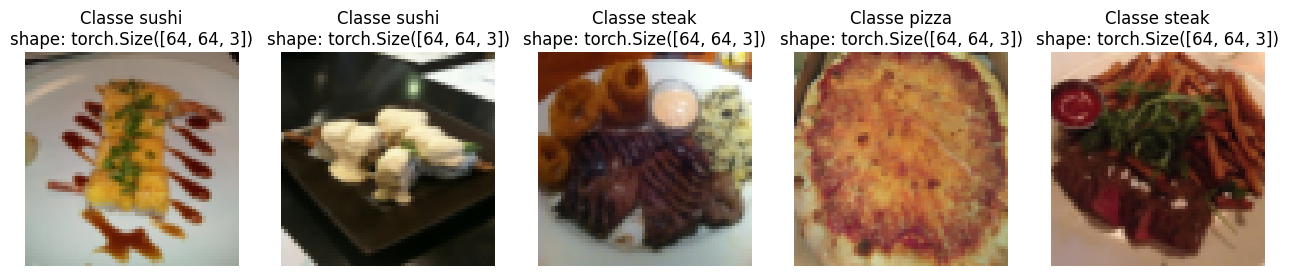

In [50]:
#Usando os dados do dataset custom
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

### 5.4 Transformando o as imagens customizaas em um DataLoader

In [51]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS= os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom



(<torch.utils.data.dataloader.DataLoader at 0x7d0e624afca0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0e624ac940>)

In [52]:
# Pegando umaz imagem e label do dataloader custom
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Outros tipos de transformacoes(data augmentation)

O proceeso consiste em adicionar diversidade aos nossos dados de maneira artificial

No caso de imagens, isso pode ser feito aplicando varias trasnformacoes nas nossas imagens de treino.

Tal pratica, esperamos, deixar o modelo mais generalizavel para dados nao vistos.

Vamos usar um tipo de "data augmentation" usado para treinar modelos de visao computacional do Pytorch no vivel de  "state of the art": frequentemente se refere a técnicas ou resultados que representam o melhor desempenho ou a tecnologia mais avançada disponível atualmente.

In [53]:
from torchvision import transforms

train_transform = transforms.Compose([
                                      transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
                                      ])

test_transform = transforms.Compose([
                                      transforms.Resize(size=(224, 244)),
                                      transforms.ToTensor()
                                      ])

In [54]:
image_path

PosixPath('data/pizza_stake_sushi')

In [55]:
#Pegando o caminho de todas as imagens
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_stake_sushi/test/pizza/1503858.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/398345.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_stake_sushi/test/pizza/1925494.jpg')]

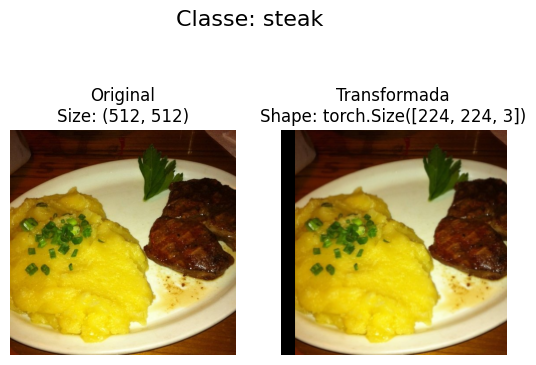

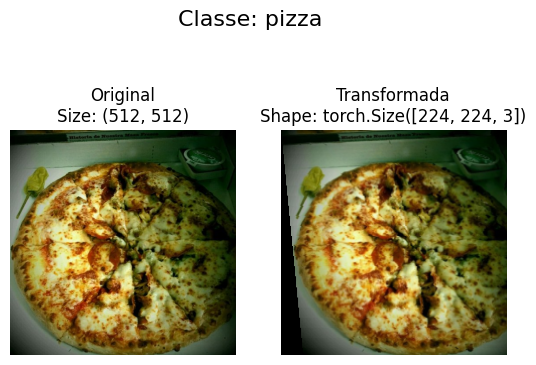

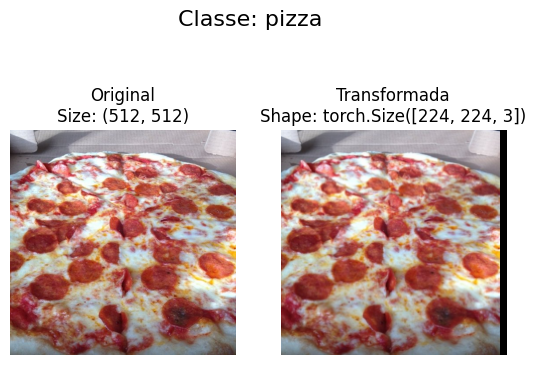

In [56]:
#Plotando as images transformadas de maneira aleatoria
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG sem "Data Augmentation"

Replicando o modelo do CNN Explainer

### 7.1 Criando os transformadores e carregando os dados para o Modelo 0

In [57]:
#Criando uma transformador simples

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [58]:
# 1 Carregando a transformando os dados
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple =datasets.ImageFolder(root=test_dir,
                                       transform=simple_transform)

# 2 Transformando o dataset em dataloaders
import os
from torch.utils.data import DataLoader

#COnfigurando o tamanho do batch e numero de cores
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Criando o DataLoader
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False,
                                    )

### 7.2 Criando uma classe para o modelo TinyVGG

In [59]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Por default o valor do stride eh igual ao kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Por default o valor do stride eh igual ao kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    #return self.classifier(self.conv_block_2(self.conv_block_1(x))) #Beneficia LEr how to make your GPU go brrrrrrrrrr from firts principles
    return x

In [60]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #Numero de canais de cores
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Tentando realizar um Forward pass em uma imagem(Para testar o modelo)

In [61]:
#Pegando um batch de imagem
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [62]:
#Tentando realizar o forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.3 Usado torchinfo para ver os shapes do modelo

In [63]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Criando funcoes para o loop de treino e teste

* train_step() - Recebe um modelo e um dataloader, e os treino com o dataloader

* test_step() - Recebe um modelo e um dataloader e avalia o modelo com o dataloader

In [64]:
#Cirnado a train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):

  #Colocando o modelo em mode treino
  model.train()

  #Configurando os valores iniciais de perca e acuracia
  train_loss, train_acc = 0, 0

  #Passa pelos lotes de dados do data loader
  for batch, (X, y) in enumerate(dataloader):
    #Mandando para o dispositivo usado
    X, y, = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X) #Saidas brutas

    # 2. Calculando a perca
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer step()
    optimizer.step()

    # Claculando as predicas de acucaria
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Ajustanda as metricas para conseguir a media da acuracia e perca por batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc





In [65]:
#Criando a test_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  #Colocando em modo de avaliacao
  model.eval()

  #COnfigurando a perca e acuracia do test
  test_loss, test_acc = 0, 0

  #Ligando o modo de inferencia
  with torch.inference_mode():
    #Passando pelos lote do dataloader
    for batch, (X, y) in enumerate(dataloader):
      #Colocando os dados no dispositivos certo
      X, y = X.to(device), y.to(device)

      # 1., Forward pass
      test_pred_logits = model(X)

      # 2. Calculando a perca
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      #Calculando a acuracia
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc +=((test_pred_labels == y).sum().item()/len(test_pred_labels))

  #Ajustando as metrica para pegar os valores medio de perca e acuracia por batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


### 7.6 Criando uma funcao train(), para combinar a train_step() e test_step()

In [66]:
from tqdm.auto import tqdm

#CRiando uma classe de treinamento que recebe vaior parametros do modelo + otimizador + dataloader + funcao de perca
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = torch.nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device
          ):

  # 2. Criando um dicionario vazio para os resultados
  results = {"train_loss" : [],
             "train_acc" : [],
             "test_loss" : [],
             "test_acc": []}

  # 3. PAssando pelos passos de treino e test conformeas epocas
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)

    test_loss, test_acc = test_step(model=model,
                                   dataloader=test_dataloader,
                                   loss_fn=loss_fn,
                                   device=device)

    # 4. Na tela DJ
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    # 5. Atualizando os resultados do dicionario
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Retornaod os resultados preenchidos ao fim das epocas
  return results

### 7.7 Treinando e avaliando o Modelo 0

In [67]:
#Sedd
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Num epocas
NUM_EPOCHS = 5

#Recriando a instancia da TinyVGG
model_0 = TinyVGG(input_shape=3, #Numero de canais coloridos
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

#Configurando a funcao de perca e optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.01)

#Conometro
from timeit import default_timer as timer
start_time = timer()

#TReinando de fato do modelo 0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Tempo tatal de treino: {end_time - start_time:.3f} segundos")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.2059 | Train Acc: 0.3438 | Test Loss: 1.1170 | Test Acc: 0.5417
Epoch: 1 | Train Loss: 1.1660 | Train Acc: 0.2812 | Test Loss: 1.0799 | Test Acc: 0.5417
Epoch: 2 | Train Loss: 1.1117 | Train Acc: 0.3008 | Test Loss: 1.1033 | Test Acc: 0.2282
Epoch: 3 | Train Loss: 1.1000 | Train Acc: 0.2969 | Test Loss: 1.0926 | Test Acc: 0.5417
Epoch: 4 | Train Loss: 1.0975 | Train Acc: 0.4023 | Test Loss: 1.0944 | Test Acc: 0.5417
Tempo tatal de treino: 25.970 segundos


In [68]:
# 5 = 12s 10 25s
# 5 = Epoch: 4 | Train Loss: 1.0975 | Train Acc: 0.4023 | Test Loss: 1.0944 | Test Acc: 0.5417
# 10 = Epoch: 9 | Train Loss: 1.0962 | Train Acc: 0.4023 | Test Loss: 1.0885 | Test Acc: 0.5417

In [69]:
model_0_results

{'train_loss': [1.2059235125780106,
  1.1660106629133224,
  1.111730381846428,
  1.100031316280365,
  1.0974968671798706],
 'train_acc': [0.34375, 0.28125, 0.30078125, 0.296875, 0.40234375],
 'test_loss': [1.1170276999473572,
  1.0798708995183308,
  1.1033344268798828,
  1.092569907506307,
  1.0944202343622844],
 'test_acc': [0.5416666666666666,
  0.5416666666666666,
  0.228219696969697,
  0.5416666666666666,
  0.5416666666666666]}

### 7.8 Plotando a curva da perda do Modelo 0

Uma curva de perda e uma metrica para avaliar o progresso do modelo atraves do tempo

In [70]:
#"Keys" dos resultados do modelo 0
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [71]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plotagem das curvas df resultados do dicionario"""
  #Pegar os valores da perda do dicionario de resultados(Treino e Teste)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  #Pegar os valores da acuracia do dicionario de resultados(Treino e Teste)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  #Descobrindo a quantidade de epocas
  epochs =  range(len(results["train_loss"]))

  #Configurando o plot
  plt.figure(figsize=(15, 7))

  #Plotando a perda
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()


  #Plotando a Acc
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

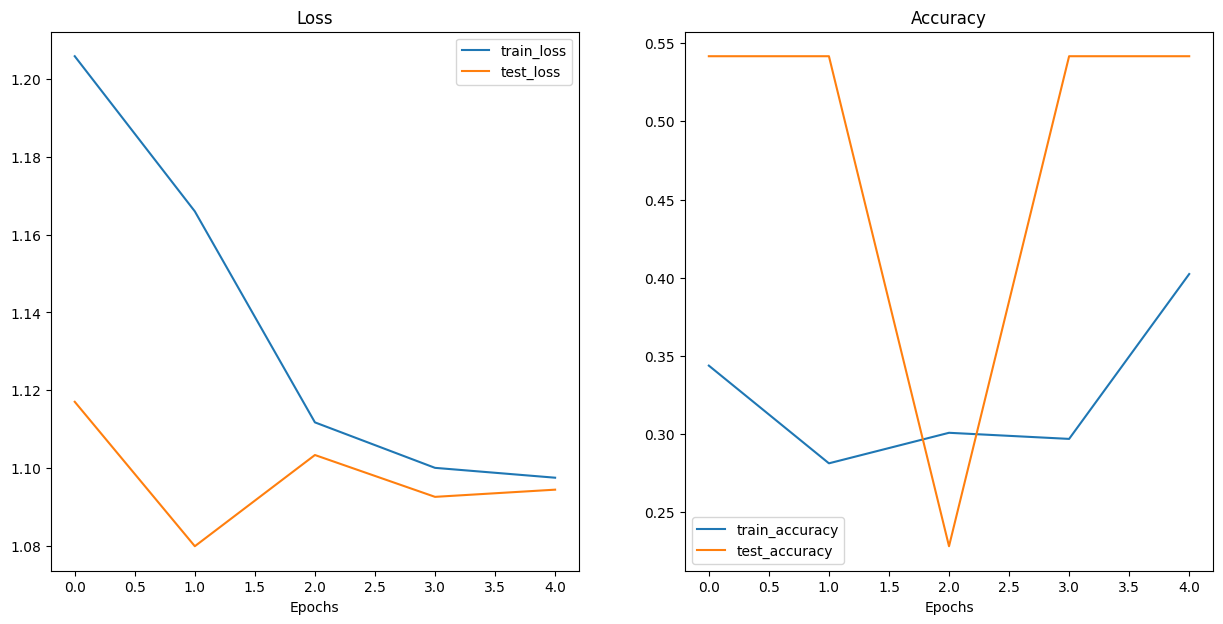

In [72]:
plot_loss_curves(model_0_results)

Underfitting X Overfitting

* *Under* - Quando o modelo nao aprender com os dados, e a curva de perda nao baixa
* *Over* - Quando o modelo aprender demais com os dados de treinamento e perde a capacidade de generalizar, logo nao conhece reconhecer os padroes em dados nao vistos. Possui uma curva de loss muito acentuado no treino

**LEMBRANDO** Que a curva de loss comeca em cima na direita e idealmente vai baixando comforme o passar do tempo.


## 8. Como deve parecer idelamente uma curva de perda?

- https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic?hl=pt-br

* A curva de perda e uma das maneiras mais uteis de diagnosticar problemas no modelo

## 9. Model 1: TyniVGG with data augmentation

Experimento 1: Mesmo modelo porem com data augmentation

In [73]:
### 9.1 Criando um "transform" com data augmentation

#Criando com TrivialAugment
train_transform_trivial = transforms.Compose([
                                            transforms.Resize(size=(64, 64)),
                                            transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                            transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
                                            transforms.Resize(size=(64, 64)),
                                            transforms.ToTensor()
])

In [74]:
#Transformando as imagens das pastas em datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [75]:
#Transformando os datasets em DataLoaders
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_data_simple = DataLoader(dataset=test_data_simple,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

### 9.3 Cosntruir e treinando o modelo 1

* Sera usado o mesmo modelo e arquitetura, porem com os dados que foram "augmentados"

In [76]:
#Criando o model_1 e selecionando o dispositivo usado
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Agora se tem um modelo e o dataloader, e necessario ainda criar uma funcao de perda e um otimizar, para entao chamar a funcao `train()` para treinar e avaliar o modelo

In [77]:
#Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Numeor de epocas
NUM_EPOCHS = 5

#Configurando a funcao de perda e otimizador
loss_fn == nn.CrossEntropyLoss()
otimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

#Tempo
from timeit import default_timer as timer
start_time = timer()

#TReinanado o modelo 1
model_1_results = train(model=model_1,
                         train_dataloader=train_dataloader_augmented,
                         test_dataloader=test_dataloader_simple,
                         optimizer=optimizer,
                         loss_fn=loss_fn,
                         epochs=NUM_EPOCHS,
                         device=device)

#Fim do temporizador e na tela
end_time = timer()

print(f"TEmpo total de treino: {end_time - start_time:.3f} segundos")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.0969 | Train Acc: 0.4258 | Test Loss: 1.0976 | Test Acc: 0.2604
Epoch: 1 | Train Loss: 1.0968 | Train Acc: 0.4258 | Test Loss: 1.0976 | Test Acc: 0.2604
Epoch: 2 | Train Loss: 1.0963 | Train Acc: 0.4258 | Test Loss: 1.0976 | Test Acc: 0.2604
Epoch: 3 | Train Loss: 1.0994 | Train Acc: 0.3047 | Test Loss: 1.0976 | Test Acc: 0.2604
Epoch: 4 | Train Loss: 1.0966 | Train Acc: 0.4258 | Test Loss: 1.0976 | Test Acc: 0.2604
TEmpo total de treino: 13.168 segundos


In [78]:
model_0_results

{'train_loss': [1.2059235125780106,
  1.1660106629133224,
  1.111730381846428,
  1.100031316280365,
  1.0974968671798706],
 'train_acc': [0.34375, 0.28125, 0.30078125, 0.296875, 0.40234375],
 'test_loss': [1.1170276999473572,
  1.0798708995183308,
  1.1033344268798828,
  1.092569907506307,
  1.0944202343622844],
 'test_acc': [0.5416666666666666,
  0.5416666666666666,
  0.228219696969697,
  0.5416666666666666,
  0.5416666666666666]}

### 9.4 Plotando a curva da perda

Para avaliar a performace do modelo ao passar do tempo

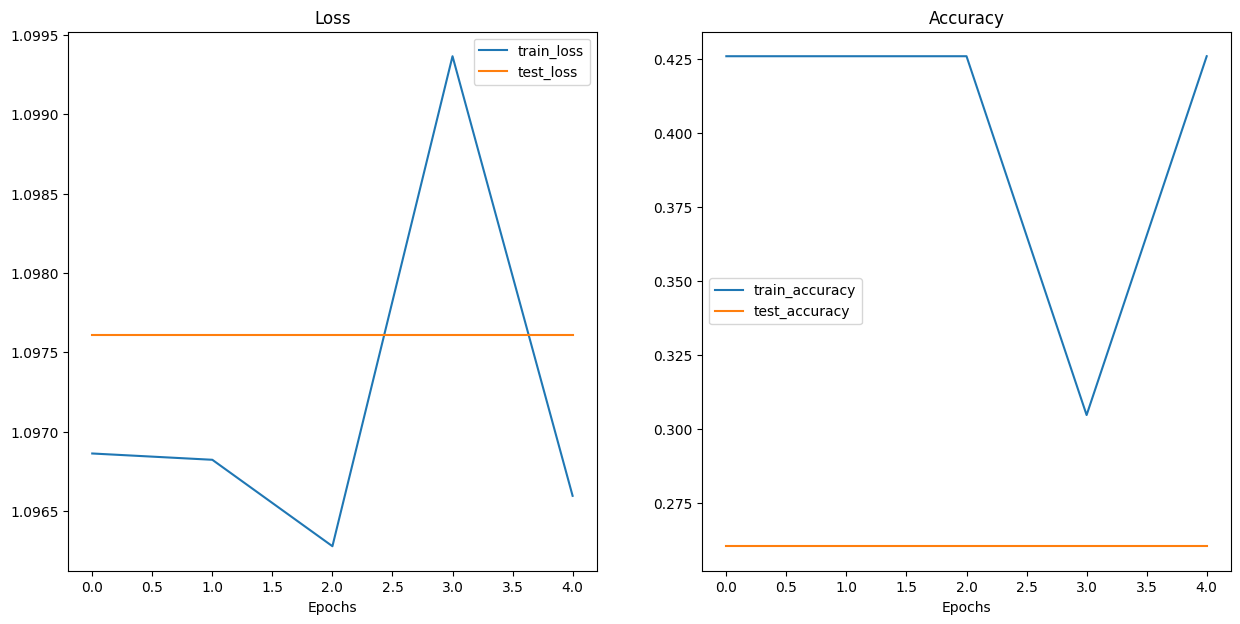

In [79]:
loss_2 = plot_loss_curves(model_1_results)

## 10. Comparando os resultados do modelos

Apos avaliar os resultados de cada experimento, e importante comparar-los entre si

Algumas maneira sao:
1. Codigo puro (oq foi feito ate entao)
2. Pytorch + Tensorboard
3. Weights & Bias - https://wandb.ai/site
4. ML flow - https://mlflow.org



In [80]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.205924,0.343750,1.117028,0.541667
1,1.166011,0.281250,1.079871,0.541667
2,1.111730,0.300781,1.103334,0.228220
3,1.100031,0.296875,1.092570,0.541667
4,1.097497,0.402344,1.094420,0.541667


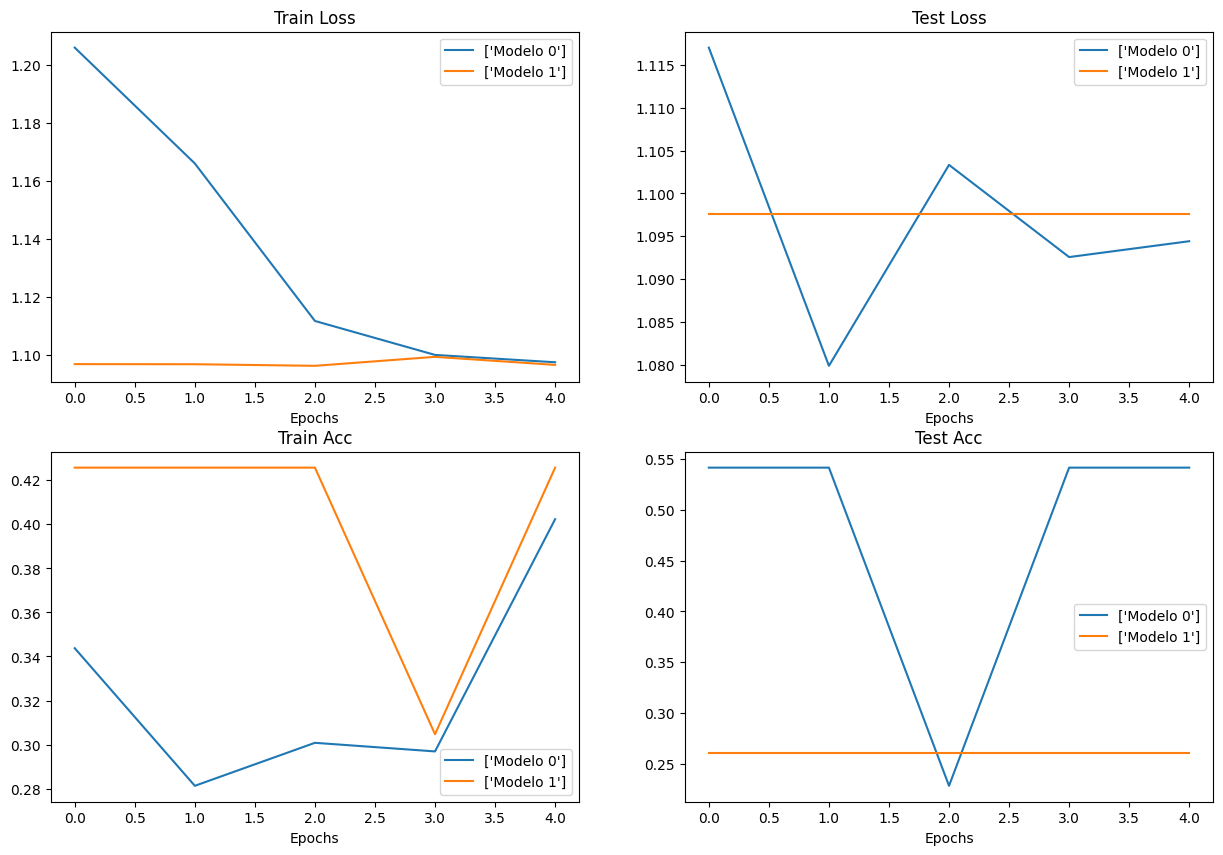

In [81]:
#Tamanho
plt.figure(figsize=(15, 10))

#Numero de epochs
epochs = range(len(model_0_df))

#Plotando a "train loss"
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label=["Modelo 0"])
plt.plot(epochs, model_1_df["train_loss"], label=["Modelo 1"])
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend();

#Plotando a "test loss"
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label=["Modelo 0"])
plt.plot(epochs, model_1_df["test_loss"], label=["Modelo 1"])
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend();

#Plotando a "train acc"
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label=["Modelo 0"])
plt.plot(epochs, model_1_df["train_acc"], label=["Modelo 1"])
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend();

#Plotando a "test acc"
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label=["Modelo 0"])
plt.plot(epochs, model_1_df["test_acc"], label=["Modelo 1"])
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend();

## Prevendo com uma imagem

Apos treianr o modelo, como fazer predicoes usando outras imagens que nao estao nos dados de teste/treino


In [85]:
#DOn https://github.com/HammadN98/pytorch/blob/c91500a4c3879f0a589949ab97b30eb69c210e14/dados/04-pizza-dad.jpeg
import requests

#COnfigurando o caminho da imagem
custom_image_path = data_path/ "04-pizza-dad.jpeg"

#Fazendo o download caso nao exista
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Download {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} ja existe cururu")

Download data/04-pizza-dad.jpeg...
